In [1]:
!pip install rouge-score bert-score

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 98.0 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=2

In [47]:
# first, install needed packages:
# pip install pandas nltk rouge-score bert-score

import pandas as pd
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from bert_score import score


# Load ground truth csv

df_gt=pd.read_csv('/content/Slake_Chest.csv')
df_gt_new=df_gt[df_gt['answer_type']=="OPEN"]
df_gt_new



,img_name,location,answer,modality,base_type,answer_type,question,qid,content_type,triple,img_id,q_lang,split
0,xmlab120/source.jpg,Lung,X-Ray,X-Ray,vqa,OPEN,What modality is used to take this image?,151,Modality,"['vhead', '_', '_']",120,en,train
1,xmlab120/source.jpg,Lung,Chest,X-Ray,vqa,OPEN,Which part of the body does this image belong to?,152,Position,"['vhead', '_', '_']",120,en,train
3,xmlab120/source.jpg,Lung,Lung,X-Ray,vqa,OPEN,What is the largest organ in the picture?,154,Size,"['vhead', '_', '_']",120,en,train
4,xmlab120/source.jpg,Lung,Effusion,X-Ray,vqa,OPEN,What diseases are included in the picture?,155,Abnormality,"['vhead', '_', '_']",120,en,train
5,xmlab120/source.jpg,Lung,"Right Lung, Lower Left",X-Ray,vqa,OPEN,Where is/are the abnormality located?,156,Position,"['vhead', '_', '_']",120,en,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117,xmlab386/source.jpg,Lung,Black,X-Ray,vqa,OPEN,What color does the left lung show in the pict...,12529,Color,"['vhead', '_', '_']",386,en,test
2118,xmlab386/source.jpg,Lung,2,X-Ray,vqa,OPEN,How many organs are there in this image?,12530,Quantity,"['vhead', '_', '_']",386,en,test
2119,xmlab386/source.jpg,Lung,Breathe,X-Ray,kvqa,OPEN,What is the effect of the main organ in this p...,12531,KG,"['vhead', 'effect', 'ktail']",386,en,test
2120,xmlab386/source.jpg,Lung,"Chest tightness, dyspnea, chest pain",X-Ray,kvqa,OPEN,What kind of symptoms will the disease on the ...,12532,KG,"['vhead', 'symptom', 'ktail']",386,en,test


In [83]:
#Load generated response csv

df_res = pd.read_csv('/content/drive/MyDrive/685_Project/eval_outputs/llava_preds_slake_graphrag.csv')
df_res

In [76]:
#Match ground truth csv with generated response csv using question ID

df_res=df_res[df_res['qid'].isin(df_gt['qid'])]
df_res

,qid,img_name,question,graphrag_output,top_k_contents,model_output
0,151,Slake_Chest_Images/xmlab120/source.jpg,What modality is used to take this image?,The modality used to take this image is a ches...,FINAL REPORT\...,The modality used to take this image is a ches...
1,152,Slake_Chest_Images/xmlab120/source.jpg,Which part of the body does this image belong to?,The images in the provided context belong to t...,FINAL REPORT\...,The images in the provided context belong to t...
2,154,Slake_Chest_Images/xmlab120/source.jpg,What is the largest organ in the picture?,"The largest organ in the picture is the lungs,...",FINAL REPORT\...,The largest organ in the human body is the ski...
3,155,Slake_Chest_Images/xmlab120/source.jpg,What diseases are included in the picture?,The diseases included in the context are:\n\n1...,FINAL REPORT\...,The diseases included in the context are:\n\n1...
4,156,Slake_Chest_Images/xmlab120/source.jpg,Where is/are the abnormality located?,The abnormalities are located at the right bas...,FINAL REPORT\...,The abnormalities are located at the right bas...
...,...,...,...,...,...,...
600,152,Slake_Chest_Images/xmlab120/source.jpg,Which part of the body does this image belong to?,The images in the provided context belong to t...,FINAL REPORT\...,The lungs are clear.
601,154,Slake_Chest_Images/xmlab120/source.jpg,What is the largest organ in the picture?,"The largest organ in the picture is the lungs,...",FINAL REPORT\...,The largest organ in the picture is the heart.
602,155,Slake_Chest_Images/xmlab120/source.jpg,What diseases are included in the picture?,The diseases included in the context are:\n\n1...,FINAL REPORT\...,The most recent study is from ___ and there is...
603,156,Slake_Chest_Images/xmlab120/source.jpg,Where is/are the abnormality located?,The abnormalities are located at the right bas...,FINAL REPORT\...,The abnormality is located in the right lung b...


In [19]:
#Remove Nan Values
df_gt['ANSWER'] = df_gt['ANSWER'].fillna('').astype(str)

In [38]:
#Check length match
len(df_res['model_output']), len(df_gt['ANSWER'])

(467, 283)

In [51]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased", use_fast=True)

# 3. Define a helper to truncate to max_length tokens
def truncate_to_max_length(text: str, max_length: int = 512) -> str:
    tokens = tokenizer.tokenize(text)
    specials = tokenizer.num_special_tokens_to_add(pair=False)
    max_length=max_length-specials
    if len(tokens) > max_length:
        tokens = tokens[:max_length]
    return tokenizer.convert_tokens_to_string(tokens)

references = [truncate_to_max_length(str(gt)) for gt in df_gt_filtered['answer']]

In [85]:

candidates = [truncate_to_max_length(str(pred)) for pred in df_res['model_output']]

P, R, F1 = score(
    candidates, # Use truncated column
    references,       # Use truncated column
    lang='en',
    model_type='microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext',
    rescale_with_baseline=True,
    num_layers=12,
    idf=True,# Explicitly specify the number of layers
    device='cuda' # Specify the device
)
print(f"BERTScore → P: {P.mean().item():.4f}, R: {R.mean().item():.4f}, F1: {F1.mean().item():.4f}")

BERTScore → P: 0.8690, R: 0.8957, F1: 0.8821


In [ ]:
# 2) Prepare tokenized references & hypotheses for BLEU
#    BLEU expects list of reference lists: [[ref1_tokens], [ref2_tokens], …] for each example
refs = [r.split() for r in df_gt['ANSWER']]
refs_corpus= [[r.split()] for r in df_gt['ANSWER']]# note the extra nesting for corpus_bleu
hyps = [h.split() for h in df_res['llama_3_2-VI query_RAG response']]

In [ ]:
smooth = SmoothingFunction().method1
sent_bleus = [
    sentence_bleu([r], h, smoothing_function=smooth)
    for r, h in zip(refs, hyps)
]
print(f"Avg. sentence‐BLEU: {sum(sent_bleus)/len(sent_bleus):.4f}")

# Corpus‐level BLEU
print(f"Corpus‐BLEU:       {corpus_bleu(refs_corpus, hyps):.4f}")

Avg. sentence‐BLEU: 0.0026
Corpus‐BLEU:       0.0008


In [ ]:
smooth = SmoothingFunction().method1
sent_bleus = [
    sentence_bleu([r], h, smoothing_function=smooth)
    for r, h in zip(refs, hyps)
]
print(f"Avg. sentence‐BLEU: {sum(sent_bleus)/len(sent_bleus):.4f}")

# Corpus‐level BLEU
print(f"Corpus‐BLEU:       {corpus_bleu(refs_corpus, hyps):.4f}")

Avg. sentence‐BLEU: 0.0025
Corpus‐BLEU:       0.0013


In [ ]:
# 4) ROUGE-L (F-measure)
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
rouge_l_f1s = [
    scorer.score(gold, pred)['rougeL'].fmeasure
    for gold, pred in zip(df_gt['ANSWER'], df_res['llama_3_2-VI query_GR response'])
]
print(f"Avg. ROUGE-L F1:         {sum(rouge_l_f1s)/len(rouge_l_f1s):.4f}")



Avg. ROUGE-L F1:         0.0413


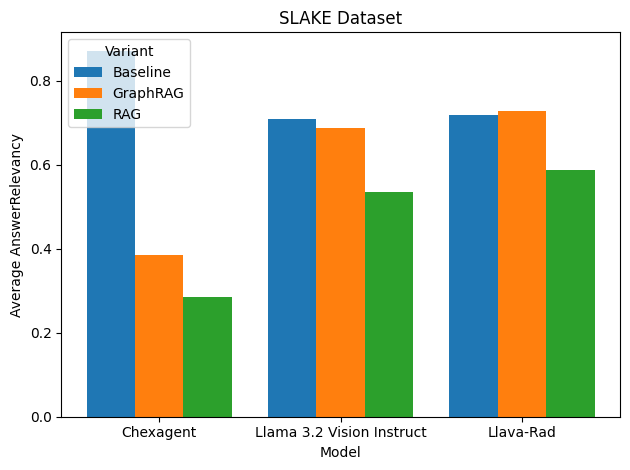

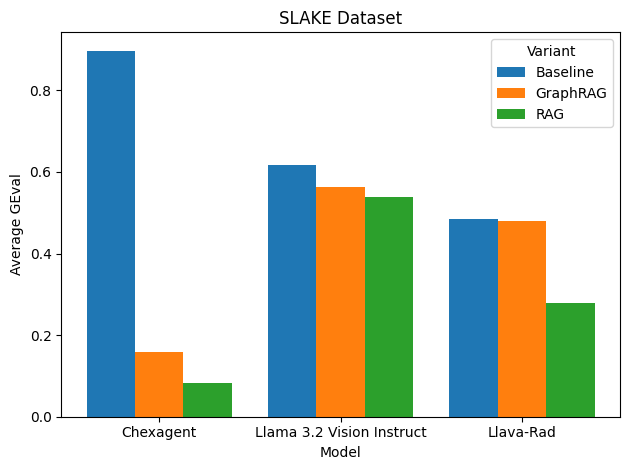

In [ ]:
#Plots

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Map each model family to its three variant CSV paths
file_paths = {
    "Llama 3.2 Vision Instruct": {
        "Baseline": "/content/drive/MyDrive/685_Project/eval_outputs/deepeval_results/deepeval_results_llama3_vi_slake_baseline.csv",
        "RAG":      "/content/drive/MyDrive/685_Project/eval_outputs/deepeval_results/deepeval_results_llama3_vi_slake_only_rag.csv",
        "GraphRAG": "/content/drive/MyDrive/685_Project/eval_outputs/deepeval_results/deepeval_results_llama3_vi_slake_graphrag.csv",
    },
    "Llava-Rad": {
        "Baseline": "/content/drive/MyDrive/685_Project/eval_outputs/deepeval_results/deepeval_results_llava_rad_slake_baseline.csv",
        "RAG":      "/content/drive/MyDrive/685_Project/eval_outputs/deepeval_results/deepeval_results_llava_rad_slake_only_rag.csv",
        "GraphRAG": "/content/drive/MyDrive/685_Project/eval_outputs/deepeval_results/deepeval_results_llava_rad_slake_graphrag.csv",
    },
    "Chexagent": {
        "Baseline": "/content/drive/MyDrive/685_Project/eval_outputs/deepeval_results/deepeval_results_chexagent_slake_baseline.csv",
        "RAG":      "/content/drive/MyDrive/685_Project/eval_outputs/deepeval_results/deepeval_results_chexagent_slake_only_rag.csv",
        "GraphRAG": "/content/drive/MyDrive/685_Project/eval_outputs/deepeval_results/deepeval_results_chexagent_slake_graphrag.csv",
    },
}

# 2) Read & tag each DataFrame, then concatenate
records = []
for family, variants in file_paths.items():
    for variant, path in variants.items():
        df = pd.read_csv(path)
        df["Family"]  = family
        df["Variant"] = variant
        records.append(df)
combined = pd.concat(records, ignore_index=True)

# 3) Compute average metric_score per (Family, Variant, metric_name)
avg = (
    combined
    .groupby(["Family", "Variant", "metric_name"])["metric_score"]
    .mean()
    .reset_index()
)

# 4) For each metric, pivot & plot grouped bars
metrics = avg["metric_name"].unique()

for metric in metrics:
    dfm   = avg[avg["metric_name"] == metric]
    pivot = dfm.pivot(index="Family", columns="Variant", values="metric_score")

    families = pivot.index.tolist()
    variants = pivot.columns.tolist()
    x        = np.arange(len(families))

    total_width = 0.8
    width       = total_width / len(variants)

    plt.figure()
    for i, var in enumerate(variants):
        plt.bar(
            x + i*width - total_width/2 + width/2,
            pivot[var],
            width=width,
            label=var
        )
    plt.xticks(x, families, rotation=0)
    plt.xlabel("Model")
    plt.ylabel(f"Average {metric}")
    plt.title(f"SLAKE Dataset")
    plt.legend(title="Variant")
    plt.tight_layout()
    plt.show()


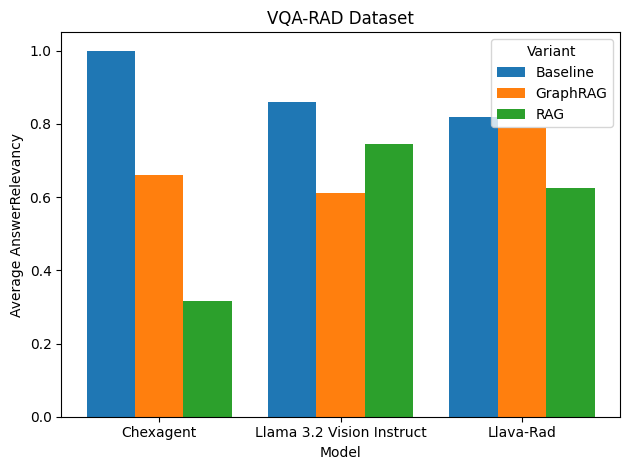

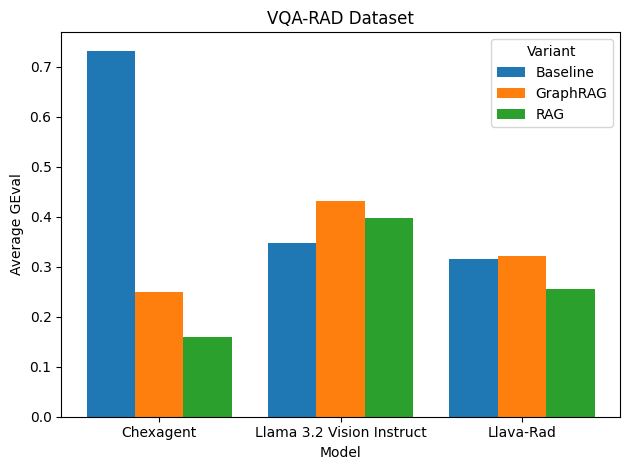

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Map each model family to its three variant CSV paths
file_paths = {
    "Llama 3.2 Vision Instruct": {
        "Baseline": "/content/drive/MyDrive/685_Project/eval_outputs/deepeval_results/deepeval_results_llama3_vi_vqa_rad_baseline.csv",
        "RAG":      "/content/drive/MyDrive/685_Project/eval_outputs/deepeval_results/deepeval_results_llama3_vi_vqa_rad_only_rag.csv",
        "GraphRAG": "/content/drive/MyDrive/685_Project/eval_outputs/deepeval_results/deepeval_results_llama3_vi_vqa_rad_graphrag.csv",
    },
    "Llava-Rad": {
        "Baseline": "/content/drive/MyDrive/685_Project/eval_outputs/deepeval_results/deepeval_results_llava_rad_vqa_rad_baseline.csv",
        "RAG":      "/content/drive/MyDrive/685_Project/eval_outputs/deepeval_results/deepeval_results_llava_rad_vqa_rad_only_rag.csv",
        "GraphRAG": "/content/drive/MyDrive/685_Project/eval_outputs/deepeval_results/deepeval_results_llava_rad_vqa_rad_graphrag.csv",
    },
    "Chexagent": {
        "Baseline": "/content/drive/MyDrive/685_Project/eval_outputs/deepeval_results/deepeval_results_chexagent_vqa_rad_baseline.csv",
        "RAG":      "/content/drive/MyDrive/685_Project/eval_outputs/deepeval_results/deepeval_results_chexagent_vqa_rad_only_rag.csv",
        "GraphRAG": "/content/drive/MyDrive/685_Project/eval_outputs/deepeval_results/deepeval_results_chexagent_vqa_rad_graphrag.csv",
    },
}

# 2) Read & tag each DataFrame, then concatenate
records = []
for family, variants in file_paths.items():
    for variant, path in variants.items():
        df = pd.read_csv(path)
        df=df[50:100]
        df["Family"]  = family
        df["Variant"] = variant
        records.append(df)
combined = pd.concat(records, ignore_index=True)

# 3) Compute average metric_score per (Family, Variant, metric_name)
avg = (
    combined
    .groupby(["Family", "Variant", "metric_name"])["metric_score"]
    .mean()
    .reset_index()
)

# 4) For each metric, pivot & plot grouped bars
metrics = avg["metric_name"].unique()

for metric in metrics:
    dfm   = avg[avg["metric_name"] == metric]
    pivot = dfm.pivot(index="Family", columns="Variant", values="metric_score")

    families = pivot.index.tolist()
    variants = pivot.columns.tolist()
    x        = np.arange(len(families))

    total_width = 0.8
    width       = total_width / len(variants)

    plt.figure()
    for i, var in enumerate(variants):
        plt.bar(
            x + i*width - total_width/2 + width/2,
            pivot[var],
            width=width,
            label=var
        )
    plt.xticks(x, families, rotation=0)
    plt.xlabel("Model")
    plt.ylabel(f"Average {metric}")
    plt.title(f"VQA-RAD Dataset")
    plt.legend(title="Variant")
    plt.tight_layout()
    plt.show()
